In [1]:
from respy import RespyCls, estimate, simulate
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Basic Usage of Respy

In [14]:
%%file example.ini
BASICS

periods                      10
delta                    0.9900

OCCUPATION A

coeff                    9.2100
coeff                    0.090
coeff                    0.0530
coeff                   -0.0005
coeff                    0.0000
coeff                   -0.0000

OCCUPATION B

coeff                    8.4800
coeff                    0.150
coeff                    0.0220
coeff                   -0.0005
coeff                    0.0770
coeff                   -0.0010

EDUCATION

coeff                    0.0000
coeff                   -0.0000
coeff                -4000.0000

start                   10
max                     20

HOME

coeff                17750.0000

SHOCKS

coeff                    0.2000
coeff                    0.0000
coeff                    0.0000
coeff                    0.0000
coeff                    0.2500
coeff                    0.0000
coeff                    0.0000
coeff                 1500.0000
coeff                    0.0000
coeff                 1500.0000

SOLUTION

draws                        50
seed                        456
store                     False

SIMULATION

agents                     2000
file             data.respy.dat
seed                        132

ESTIMATION

agents                      100
file             data.respy.dat
optimizer           FORT-NEWUOA
tau                         500
maxfun                       50
draws                       200
seed                        500

PROGRAM

debug                      True
version                 FORTRAN

DERIVATIVES

version     forward-differences
eps           0.000100000000000

SCALING

flag                       True
minimum                 0.00001

PARALLELISM

flag                      False
procs                         3

INTERPOLATION

flag                      False
points                      200

SCIPY-BFGS

gtol                     0.0001
maxiter                       1

SCIPY-POWELL

maxiter                       1
maxfun                  1000000
ftol                     0.0001
xtol                     0.0001

FORT-NEWUOA

npt                         53
rhobeg                     1.0
rhoend                0.000001
maxfun                 1000000

Overwriting example.ini


In [15]:
# make an instance of the respy class.
# this just reads in the .ini file and checks that everything makes sense
respy_obj = RespyCls('example.ini')

# set a seed
np.random.seed(5471)

# create a simulated dataset in which the parameters we specified are
# the true population parameters
simulate(respy_obj)

In [16]:
# estimate parameters on the simulated dataset.
# full estimation of a model takes too long on this old laptop. 
# I therefore set the maximum number of function evaluations to 50
params, crit_val = estimate(respy_obj)

In [17]:
params

array([  9.21000000e+00,   9.00000000e-02,   5.30000000e-02,
        -5.00000000e-04,   0.00000000e+00,   0.00000000e+00,
         8.48000000e+00,   1.50000000e-01,   2.20000000e-02,
        -5.00000000e-04,   7.70000000e-02,  -1.00000000e-03,
         0.00000000e+00,   0.00000000e+00,  -4.00000000e+03,
         1.77500000e+04,   2.00000000e-01,   0.00000000e+00,
         2.50000000e-01,   0.00000000e+00,   0.00000000e+00,
         1.50000000e+03,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.50000000e+03])

# Playing around with the simulated dataset

In [18]:
data = pd.read_csv('data.respy.dat', delim_whitespace=True, header=-1, na_values='.')
data.columns = ['id', 'period', 'choice', 'earnings', 'experience_a',
                'experience_b', 'schooling', 'lagged_schooling']
data.head()

,id,period,choice,earnings,experience_a,experience_b,schooling,lagged_schooling
0,0,0,1,26250.53,0,0,10,1
1,0,1,1,25850.16,1,0,10,0
2,0,2,1,36441.70,2,0,10,0
3,0,3,1,30941.57,3,0,10,0
4,0,4,1,21272.74,4,0,10,0
5,0,5,1,29563.38,5,0,10,0
6,0,6,1,29186.12,6,0,10,0
7,0,7,1,25558.54,7,0,10,0
8,0,8,1,43058.16,8,0,10,0
9,0,9,1,47368.34,9,0,10,0


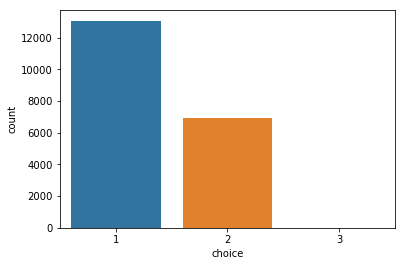

In [12]:
sns.countplot(data['choice'])

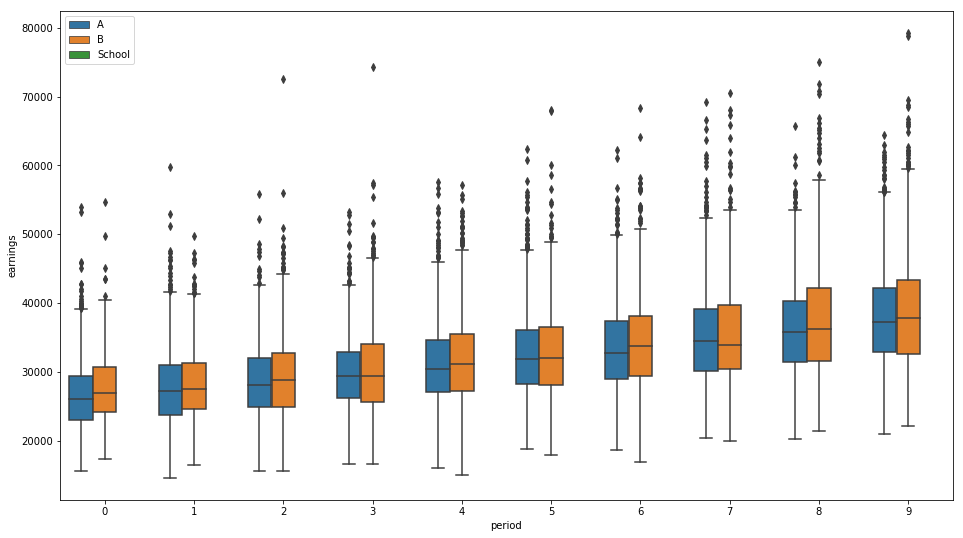

In [13]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.boxplot(y='earnings', x='period', data=data, hue='choice')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['A', 'B', 'School'])